# TODO(after verifying whether there are repeatable forces acting along activation fronts): Studying activation front curvature
Tim Tyree<br>
5.3.2021

In [1]:
from lib.my_initialization import *

In [2]:
#TODO: import example and compute arclen_values
#TODO: interpolate txt to contour nodes
#TODO: get a sample activation front identified in terms of arcVc_values
#TODO: plot curvature versus sigma at t=900
#TODO: see how ^that evolves with time

- ...TODO: come up with some simple rules for curvature versus time
- ...TODO: use intersections to compute interactions between activation fronts

In [3]:
#dev curvature of line
import numpy as np

a = np.array([ [  0.  ,   0.  ],[  0.3 ,   0.  ],[  1.25,  -0.1 ],
              [  2.1 ,  -0.9 ],[  2.85,  -2.3 ],[  3.8 ,  -3.95],
              [  5.  ,  -5.75],[  6.4 ,  -7.8 ],[  8.05,  -9.9 ],
              [  9.9 , -11.6 ],[ 12.05, -12.85],[ 14.25, -13.7 ],
              [ 16.5 , -13.8 ],[ 19.25, -13.35],[ 21.3 , -12.2 ],
              [ 22.8 , -10.5 ],[ 23.55,  -8.15],[ 22.95,  -6.1 ],
              [ 21.35,  -3.95],[ 19.1 ,  -1.9 ]])

In [7]:
# # TODO(for modeling the curvature dynamics...)
# # TODO: get location values of an activation front identified via voltage>V_threshold values or dVcdt_avg>0
# def compute_curvature(array):
#     '''array is a numpy array of size N-by-2 that indicates
#     a continuous curve embedded in the extended real plane.
#     returns a dict of (signed?) curvature values (with other geometric values)
#     Example Usage:
#     dict_curvature=compute_curvature(array=a)
#     sigma_unitless_values=np.linspace(0,1,curvature.shape[0])
#     curvature_values=dict_curvature['curvature']
#     plt.plot(sigma_unitless_values,curvature_values)
#     plt.xlabel('position')
#     plt.ylabel('curvature')
#     plt.show()
#     '''
#     a=array
#     dx_dt = np.gradient(a[:, 0])
#     dy_dt = np.gradient(a[:, 1])
#     velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])
#     ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)
#     tangent = np.array([1/ds_dt] * 2).transpose() * velocity
#     tangent_x = tangent[:, 0]
#     tangent_y = tangent[:, 1]

#     deriv_tangent_x = np.gradient(tangent_x)
#     deriv_tangent_y = np.gradient(tangent_y)

#     dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

#     length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

#     normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

#     d2s_dt2 = np.gradient(ds_dt)
#     d2x_dt2 = np.gradient(dx_dt)
#     d2y_dt2 = np.gradient(dy_dt)

#     curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
#     t_component = np.array([d2s_dt2] * 2).transpose()
#     n_component = np.array([curvature * ds_dt * ds_dt] * 2).transpose()
#     acceleration = t_component * tangent + n_component * normal
#     dict_curvature={'normal':normal,
#                    'curvature':curvature,
#                     'n_component':n_component,
#                     't_component':t_component,
#                     'acceleration':acceleration,
#                    }
#     return dict_curvature
from lib.measure.curvature import *

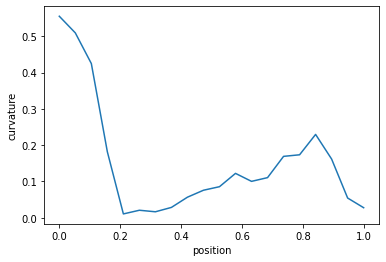

In [10]:
dict_curvature=compute_curvature(a)
curvature=dict_curvature['curvature']
sigma_unitless_values=np.linspace(0,1,curvature.shape[0])
plt.plot(sigma_unitless_values,curvature)
plt.xlabel('position')
plt.ylabel('curvature')
plt.show()

NOTE: ^this curve can be made smoother by 
1. fitting a BSpline through the data points and 
1. computing the curvature as a function of derivatives of ^that BSpline fit.

- __TODO__: save an activation front curvature values versus time as .csv

In [11]:
#TODO: fit a BSpline through these contour data points
#TODO: compute curvature function of ^that BSpline
#TODO: interpolate curvature function to node points


In [12]:
#TODO(and then...): use ^this method to compute apparent forces from a time series of positions

In [13]:
# #load a mesh from Luo-Rudy
# ic_fn=search_for_file()
try:
    ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
    txt=load_buffer(ic_fn)
    t=0
except FileNotFoundError as e:
    ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in/ic008.33.npz"
    txt=load_buffer(ic_fn)
    t=0   
    
save_folder=f"{nb_dir}/Figures/mov"    
ds=5.
frameno=0
DT=2.
dt=0.01
nsteps_per_DT=int(DT/dt)
save_every_n_frames=50

inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
V_threshold=-50;dt=0.01

# comp_dict_topo_full_color=get_comp_dict_topo_full_color(width=width,height=height,level1=V_threshold,level2=0.)
# get_one_step at this dt
__, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,dt=dt,width=width,height=height,ds=ds,diffCoef=0.0005,Cm=1.0)
# comp_dict_topo_simple=get_comp_dict_topo_simple(width=width,height=height,level1=V_threshold,level2=0)
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

img_prev=txt[...,0].copy()
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
for n in range(nsteps_per_DT):
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    t+=dt
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]

comp_tips=get_comp_tips(width,height,V_threshold)
dict_tips=comp_tips(img,img_prev,dimgdt,t,txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)


NameError: name 'load_buffer' is not defined

In [8]:
xy_values_lst =dict_tips['lesser_xy_values']

c_values_lst =dict_tips['lesser_curvature_values']
i=1
c_values=np.abs(c_values_lst[i])#.copy()
xy_values=xy_values_lst[i]
# #compute moving average of c_values
# for k in range(navg):
#     c_values[1:]=(c_values[1:]+c_values[:-1])/2.

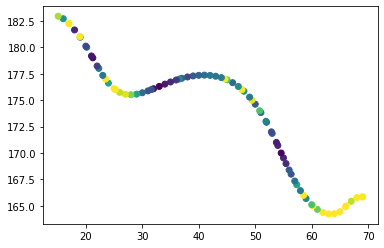

In [15]:
plt.scatter(x=xy_values[:,0],y=xy_values[:,1],c=c_values,vmin=0,vmax=5)

In [16]:
#TODO: fit a BSpline through these contour data points
#TODO: compute curvature function of ^that BSpline
#TODO: interpolate curvature function to node points


NameError: name 'BSpline' is not defined